#### CS166 Pre-class Work for Session 12.2:

### MCMC Ising Model

_Yoav Rabinovich, April 2019_

_______________________

#### Model

In [0]:
import scipy
from matplotlib import pyplot as plt

class IsingSimulation:

    J = 6.34369e-21  # Interaction constant for iron [Joule]
    kB = 1.38065e-23  # Boltzmann constant [Joule / Kelvin]

    def __init__(self, size, temperature=300):
        '''
        Create a new Ising model simulation. The state is initialized
        randomly.

        Arguments:

            size (int) The number of cells along each dimension of the
              square grid.

            temperature (float) The temperature in Kelvin at which to
              run the simulation. The Curie temperature for iron is
              1043 K. Room temperature is about 300 K. Default: 300.
        '''
        self.size = size
        self.temperature = temperature
        self.state = scipy.random.choice(
            [-1, +1], size=(self.size, self.size))
        self.step = 0

    def set_temperature(self, temp):
        '''
        Set the temperature of the model in Kelvin.
        '''
        self.temperature = float(temp)

    def energy(self):
        '''
        Compute the energy of the current state of the model.
        '''
        return -self.J * (self.state * (
            scipy.roll(self.state, 1, axis=0) +
            scipy.roll(self.state, 1, axis=1))).sum()

    def average_magnetism(self):
        '''
        Compute the average per-cell magnetism of the current state
        of the model.
        '''
        return self.state.mean()

    def update(self):
        '''
        Do a single cell update of the model state.
        '''
        # Pick a random cell to flip
        i, j = scipy.random.randint(self.size, size=2)

        # Change in energy from current state to next state
        delta_E = 2 * self.J * self.state[i,j] * (
            self.state[(i + 1) % self.size, j] +
            self.state[(i - 1) % self.size, j] +
            self.state[i, (j + 1) % self.size] +
            self.state[i, (j - 1) % self.size])

        # Log probability of changing state
        log_p = -delta_E / (self.temperature * self.kB)
        if scipy.log(scipy.random.uniform(0, 1)) < log_p:
            self.state[i,j] = -self.state[i,j]

        self.step += 1

    def display(self):
        '''
        Plot the state of the model.
        '''
        plt.figure()
        plt.imshow(self.state, vmin=-1, vmax=+1)
        plt.title('Step: ' + str(self.step) + ', M = ' + str(self.average_magnetism()))

#### Task 1: Boltzman Approximation

_We know that the Boltzmann distribution tells us what the probability is of
observing a state at equilibrium. At low temperatures, we expect the states where all cells have the
same sign (either all + or all – ) to be much more probable than any other state. So if we start from
a random initial state, we should drop into one of those two states eventually._

_Test whether this indeed happens._


In [0]:
size = 20
trials = 100
steps = 100000

magnetizations = []
for i in range(trials):
    sim = IsingSimulation(size, temperature=1)
    for _ in range(steps):
        sim.update()
    magnetizations.append(sim.average_magnetism())

#### Task 2: Simulated Annealing

_Start from a random initial state, as before, but rather than setting the temperature to 1 K
straight away, start from T = 2000 K and decrease it by 1 K after every 100 update steps
until you reach a value of T = 1 K. Wait for the simulation state to stabilize._

_What is the distribution over average magnetization now?_

In [0]:
magnetizations_annealing = []
temp = 2000
for i in range(trials):
    sim = IsingSimulation(size, temperature=temp)
    for s in range(steps):
        if sim.temperature <= 1:
            sim.temperature=1
        sim.update()
        if s%50==0:
            sim.temperature -= 1
    magnetizations_annealing.append(sim.average_magnetism())

#### Comparison

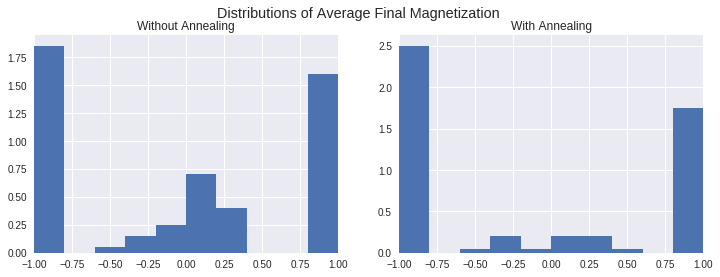

In [0]:
plt.figure(figsize=(12,4))
plt.suptitle("Distributions of Average Final Magnetization")
plt.subplot(1,2,1)
plt.title("Without Annealing")
plt.hist(magnetizations, bins=10, density=True)
plt.xlim(-1,1)
plt.subplot(1,2,2)
plt.title("With Annealing")
plt.hist(magnetizations_annealing, bins=10, density=True)
plt.xlim(-1,1)
plt.show()